![](https://www.proglobalbusinesssolutions.com/wp-content/uploads/2017/12/data-mining.jpg)

# Carga de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de data

**Descripción.** Encuesta de preferencias alimentarias 2019

Esta Encuesta se realizó entre participantes de diferentes países y demografía.

In [ ]:
!wget https://www.dropbox.com/s/ybszpwz4tk4mz6c/Food_Preference.csv

--2024-01-04 17:51:54--  https://www.dropbox.com/s/ybszpwz4tk4mz6c/Food_Preference.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ybszpwz4tk4mz6c/Food_Preference.csv [following]
--2024-01-04 17:51:55--  https://www.dropbox.com/s/raw/ybszpwz4tk4mz6c/Food_Preference.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4302f6cbefc46f5078f6dcbd62.dl.dropboxusercontent.com/cd/0/inline/CKunwEVC7zMkfmtbFga7x44x8TBiCVYhmrewsdIahkIxS_mIP1jcbsJFy_Jmiik6iLUbVL_GWGiYTUo-YAJXgjQ5kfy37gvynzMYi8VTqpXvlf6xZCWgD6tohm6Bm6OIuLOhHaaqV--ALMCbqOjy9rJB/file# [following]
--2024-01-04 17:51:55--  https://uc4302f6cbefc46f5078f6dcbd62.dl.dropboxusercontent.com/cd/0/inline/CKunwEVC7zMkfmtbFga7x44x8TBiCVYhmrewsdIahkIxS_mIP1jcbsJFy_Jmiik6iLUbVL_GWGiYTUo

In [ ]:
data_frame = pd.read_csv("Food_Preference.csv")
data_frame

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [ ]:
# Forma de acceder a una columan de DatFrame
data_frame.Gender

0        Male
1      Female
2        Male
3      Female
4        Male
        ...  
283      Male
284      Male
285      Male
286      Male
287      Male
Name: Gender, Length: 288, dtype: object

In [ ]:
# Recuerde que hay otra forma de acceder a la columna
data_frame['Gender']

0        Male
1      Female
2        Male
3      Female
4        Male
        ...  
283      Male
284      Male
285      Male
286      Male
287      Male
Name: Gender, Length: 288, dtype: object

In [ ]:
# Si quiero acceder a más de una columna a la vez
data_frame[['Gender', 'Nationality']]

,Gender,Nationality
0,Male,Indian
1,Female,Indian
2,Male,Indian
3,Female,Indian
4,Male,Indian
...,...,...
283,Male,Indian
284,Male,Indian
285,Male,Indian
286,Male,Indian


In [ ]:
# Obtiene la cantidad de filas y columnas de dataframe
data_frame.shape

(288, 8)

In [ ]:
# Obtiene el nombre de las columnas
data_frame.columns

Index(['Timestamp', 'Participant_ID', 'Gender', 'Nationality', 'Age', 'Food',
       'Juice', 'Dessert'],
      dtype='object')

# Motivación - Qué se puede hacer

Se podrían responder a las siguientes preguntas:

+ ¿Quiénes piden más postres, hombres o mujeres?
+ ¿Cuál es la preferencia de los encuestados, considerando género y tipo de comida?
+ ¿Quiénes son más indecisos a la hora de pedir postre: los hombres o las mujeres?
+ ¿Quiénes prefieren más la comida occidental, los hombres o las mujeres?
+ ¿Cuál es el promedio de edad de las personas que prefieren la comida tradicional?

# Análisis exploratorio

## Tipos de variables

In [ ]:
# Revisión de los tipos de datos
data_frame.dtypes

Timestamp         object
Participant_ID    object
Gender            object
Nationality       object
Age                int64
Food              object
Juice             object
Dessert           object
dtype: object

Usando el resultado anterior es posible detectar que se tienen 7 variables cualitativas y 1 variable cuantitativa

### Variables numéricas

In [ ]:
# Obtiene cuales son las variables numéricas
numeric_features = data_frame.describe().columns
numeric_features

Index(['Age'], dtype='object')

## Obtención medidas estadísticas

In [ ]:
data_frame.describe()

,Age
count,288.000000
mean,30.597222
std,11.180383
min,8.000000
25%,24.000000
50%,28.000000
75%,36.250000
max,80.000000


### Interpretación

+ **Primer quartil.** El 25% de los encuestados tiene una edad igual o inferior a 24 años
+ El promedio de edad de los encuestados es de 31 años
+ **Desviación estándar**. La mayor concentración de datos tiene una edad que se encuentra entre los 20 y los 42 años.

In [ ]:
data_frame.describe(include=np.object0)

,Timestamp,Participant_ID,Gender,Nationality,Food,Juice,Dessert
count,288,288,284,288,288,288,288
unique,285,288,2,27,2,2,3
top,2019/05/08 1:16:11 AM GMT+8,FPS001,Female,Indian,Traditional food,Fresh Juice,Maybe
freq,2,1,165,241,238,256,122


## Datos nulos

In [ ]:
data_frame.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            4
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

### Técnicas de tratamiento de nulos

1. Eliminar las observaciones (opción simple)
2. Imputación (mejor opción). Acá se rellenan los valores vacíos con algún valor, puede ser el promedio del valor de la columna. Puede ser el valor más repetido en el caso de una variable categórica.
3. Una extensión de la imputación. Se agrega una columna indicando que el valor ha sido reemplazado, de esta forma, se mantiene "identificados" a los valores nulos

In [ ]:
# Tratamiento de nulos a través de la imputación
moda = data_frame.Gender.mode()[0]
data_frame.Gender = data_frame.Gender.fillna(moda)
# Comprueba que el reemplazo se realiza
data_frame.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            0
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

**NOTA IMPORTANTE**

Este tema se va a profundizar más adelante

### Interpretación de medidas

In [ ]:
data_frame['Age'].describe()

count    288.000000
mean      30.597222
std       11.180383
min        8.000000
25%       24.000000
50%       28.000000
75%       36.250000
max       80.000000
Name: Age, dtype: float64

**Interpretación**

+ Una importante concentración de los encuestados tiene una edad dentro del intervalo [31-11 ; 31 + 11], es decir, [20; 42] (Recuerde la fórmula $[\mu - \sigma; \mu + \sigma]$)

+ El 75% de los encuestados tiene una edad igual o inferior a 36 años

+ El 25% de los encuestados tiene una edad igual o inferior a 24 años

**¿Puedo comprobar lo anterior?**

In [ ]:
# Calcula y muestra el intervalo
mean, std = np.mean(data_frame.Age), np.std(data_frame.Age)
lim_inf, lim_sup = mean - std, mean + std
print("Intervalo = [{0:.1f};{1:.1f}]".format(lim_inf, lim_sup))
# Busca las ocurrencias
analizados = data_frame.query("Age >= {0} & Age <= {1}".format(lim_inf, lim_sup))['Age'].count()
total = data_frame.shape[0]
print(analizados/total*100)

Intervalo = [19.4;41.8]
78.81944444444444


In [ ]:
cuartil_tres = np.quantile(data_frame.Age, 0.75)
print(cuartil_tres)
analizados = data_frame.query("Age <= {}".format(cuartil_tres))['Age'].count()
total = data_frame.shape[0]
print(analizados/total*100)

36.25
75.0


In [ ]:
cuartil_uno = np.quantile(data_frame.Age, 0.25)
print(cuartil_uno)
analizados = data_frame.query("Age <= {}".format(cuartil_uno))['Age'].count()
total = data_frame.shape[0]
print(analizados/total*100)

24.0
30.555555555555557


### Revisión de asimetría

In [ ]:
moda = data_frame.groupby('Age')['Age'].count().sort_values(ascending = False)[:1].values[0]
mediana = np.quantile(data_frame.Age, 0.5)
media = np.mean(data_frame.Age)
print("Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

Moda 23 - Mediana 28.0 - Media 30.59722222222222


**Interpretación de la relación**

El orden que se da en la recta real es moda - mediana y media; por lo tanto, existe una ***asimetría hacia la derecha (simetría positiva)***.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2CS82dzN23KbujJcy7S_lf-ghamH3OKkhGA&usqp=CAU)

### Exploración mediante una gráfica

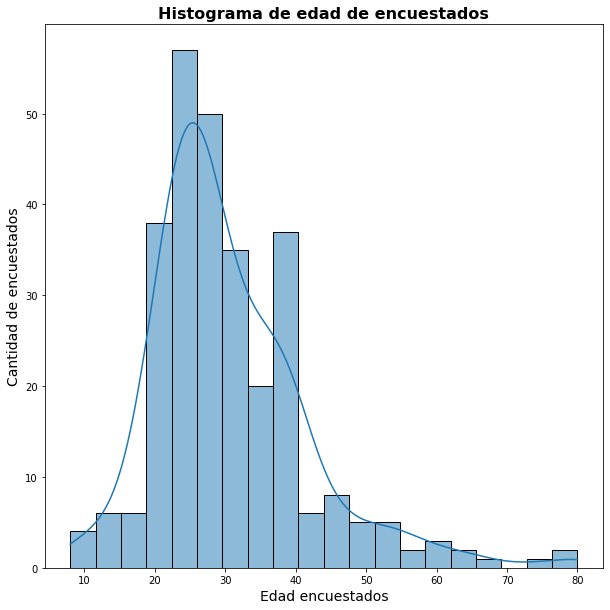

In [ ]:
# Definimos la cantidad de conjuntos que queremos usar para agrupar los valores.
num_bins = 20
plt.figure(figsize=(10,10))
sns.histplot(data_frame.Age, kde=True, bins = num_bins)
plt.xlabel('Edad encuestados', fontsize=14)
plt.ylabel('Cantidad de encuestados', fontsize=14)
plt.title(r'Histograma de edad de encuestados', fontsize=16, fontweight="bold");

**OBS.** En la gráfica se aprecia la asimetría hacia a derecha que se había comentado anteriormente.

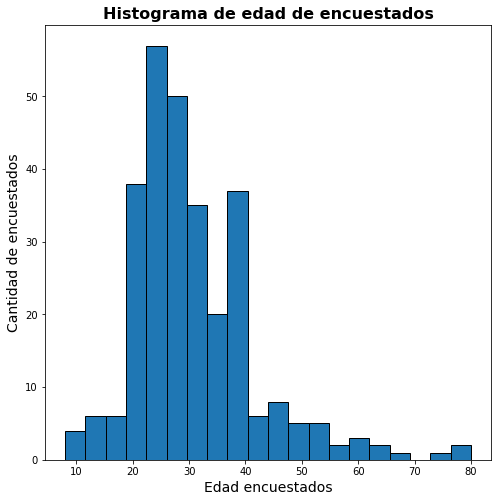

In [ ]:
# Cargamos la columna edad como variable y a graficar.
y = data_frame['Age']

# Definimos la cantidad de conjuntos que queremos usar para agrupar los valores.
num_bins = 20

# tamaño del grafico: (ancho, largo)
plt.figure(figsize=(8,8))

# Le definimos a Matplotlib que es un histograma con los valores de y agrupados en num_bins
plt.hist(y, num_bins, edgecolor='black')

# Asignamos nombres a eje x, y asi como tambien el titulo del gráfico
plt.xlabel('Edad encuestados', fontsize=14)
plt.ylabel('Cantidad de encuestados', fontsize=14)
plt.title(r'Histograma de edad de encuestados', fontsize=16, fontweight="bold")

plt.show()

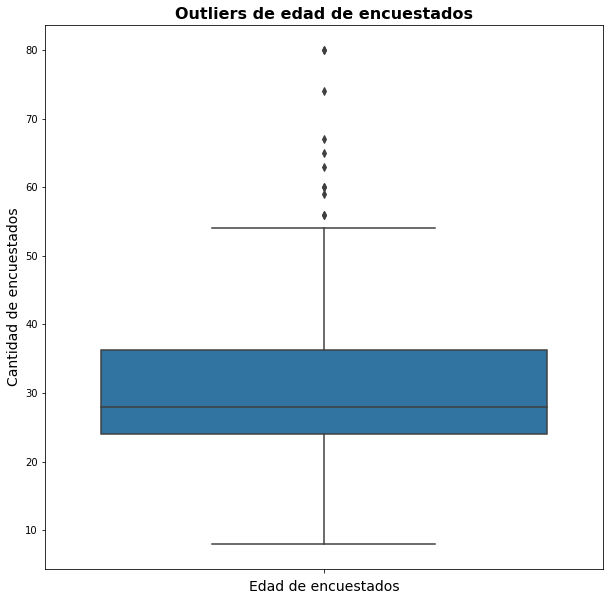

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Age, data=data_frame)
plt.xlabel('Edad de encuestados', fontsize=14)
plt.ylabel('Cantidad de encuestados', fontsize=14)
plt.title(r'Outliers de edad de encuestados', fontsize=16, fontweight="bold");

### Interpretación del diagrama


![](https://www.researchgate.net/profile/Pedro-Romero-Aroca/publication/275021043/figure/fig1/AS:294595071102976@1447248346180/Distribucion-normal-y-sus-porcentajes-respecto-de-la-desviacion-estandar.png)

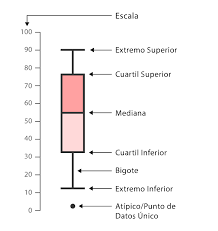

![](https://www.cursosgis.com/wp-content/uploads/cajas-y-bigotes6-700x154.png)

In [ ]:
# Calcula y muestra el intervalo exacto de la mayor concentración
mean, std = np.mean(data_frame.Age), np.std(data_frame.Age)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Extremo inferior {0:.1f} - Extremo superior : {1:.1f}".format(lim_inf, lim_sup))
# Busca las ocurrencias
analizados = data_frame.query("Age >= {0} & Age <= {1}".format(lim_inf, lim_sup))['Age'].count()
total = data_frame.shape[0]
print(analizados/total*100)

Extremo inferior 8.3 - Extremo superior : 52.9
94.09722222222221


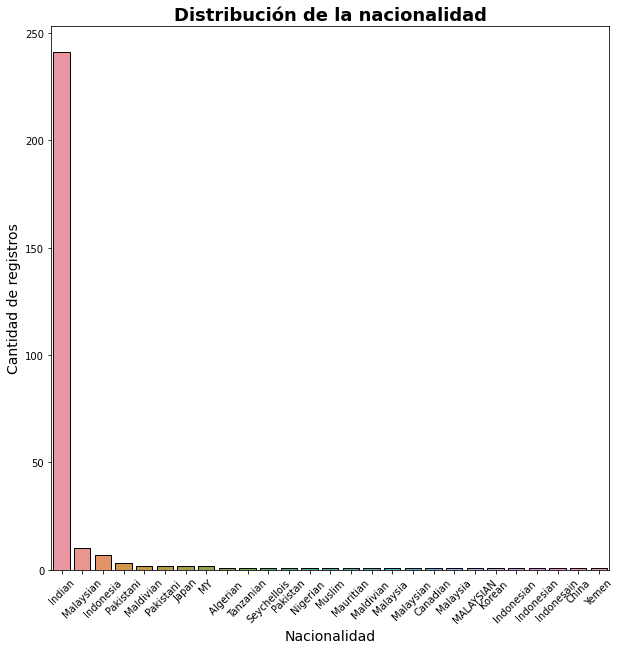

In [ ]:
# Obtiene las frecuencias de las nacionalidades
valores = data_frame.groupby('Nationality')['Nationality'].count().sort_values(ascending = False)
titulo = u"Distribución de la nacionalidad"
# Tamaño del grafico: (ancho, largo)
plt.figure(figsize=(10,10))

# Usamos el gráfico de barras de seaborn
sns.barplot(x=valores.index, y=valores, edgecolor='black')

# Asignamos etiquetas a eje x, y asi como tambien el titulo del gráfico
plt.xlabel('Nacionalidad', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Cantidad de registros', fontsize=14)
plt.title(titulo, fontsize=18, fontweight="bold")

plt.show()

El gráfico anterior evidencia que existe un sesgo hacia una sola nacionalidad, lo comprobamos mirando la tabla de frecuencias

In [ ]:
valores

Nationality
Indian         241
Malaysian       10
Indonesia        7
Pakistani        3
Maldivian        2
Pakistani        2
Japan            2
MY               2
Algerian         1
Tanzanian        1
Seychellois      1
Pakistan         1
Nigerian         1
Muslim           1
Mauritian        1
Maldivian        1
Malaysia         1
Malaysian        1
Canadian         1
Malaysia         1
MALAYSIAN        1
Korean           1
Indonesian       1
Indonesian       1
Indonesain       1
China            1
Yemen            1
Name: Nationality, dtype: int64

### Gráfico de torta

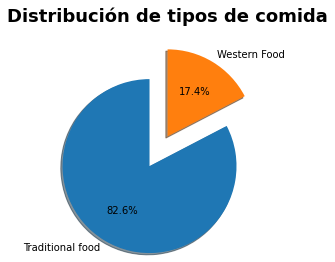

In [ ]:
tipos = data_frame['Food'].unique()
total = data_frame['Food'].value_counts().tolist()
explode = [0.4 if total[0] == max(total) else 0, 0.4 if total[1] == max(total) else 0] # Destacar algunos
plt.pie(total, labels=tipos, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribución de tipos de comida', fontsize=18, fontweight="bold")
plt.show()

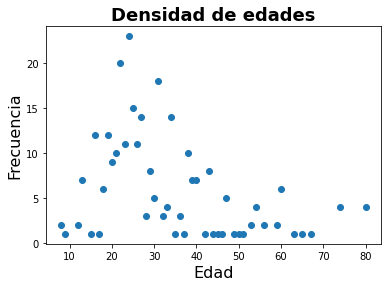

In [ ]:
# Gráfico de densidad de edades

x_values = data_frame.Age.unique()
y_values = data_frame.Age.value_counts().tolist()
plt.scatter(x_values, y_values, marker='o');
plt.title('Densidad de edades', fontsize=18, fontweight="bold")
plt.xlabel('Edad', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.show()

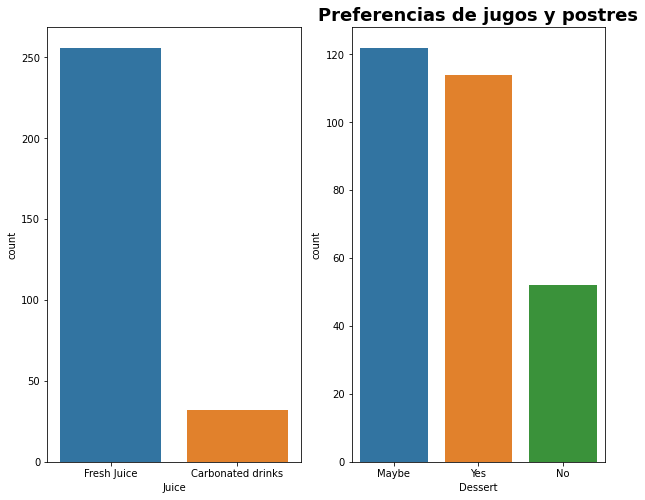

In [ ]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x=data_frame['Juice'],ax=ax1)
sns.countplot(x=data_frame['Dessert'],ax=ax2)
plt.title("Preferencias de jugos y postres", fontsize=18, fontweight="bold")
plt.show()

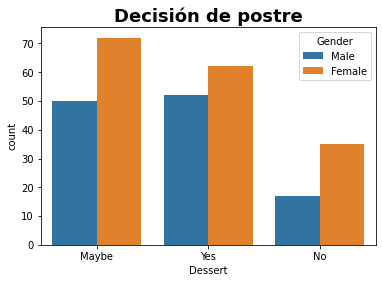

In [ ]:
plt.title("Decisión de postre", fontsize = 18, fontweight="bold")
sns.countplot(x="Dessert", hue="Gender", data=data_frame);

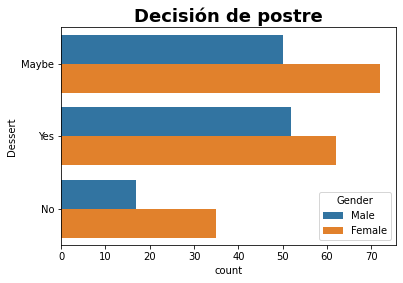

In [ ]:
plt.title("Decisión de postre", fontsize = 18, fontweight="bold")
sns.countplot(y="Dessert", hue="Gender", data=data_frame);

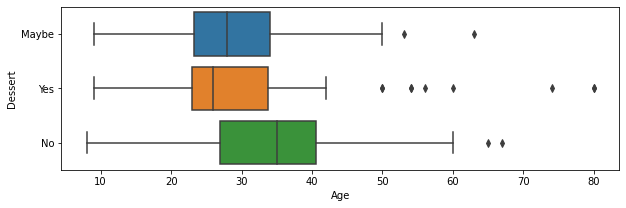

In [ ]:
# Age v/s Dessert
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,1,1)
sns.boxplot(x=data_frame['Age'],y=data_frame['Dessert']);

# Preguntas

## **PREGUNTA 1** - ¿Quiénes piden más postres, hombres o mujeres?

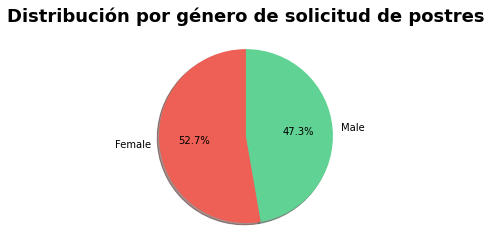

In [ ]:
# Respondiendo, gráficamente a: ¿Quiénes piden más postres, los hombres o las mujeres?
df_pie = pd.DataFrame(data_frame[data_frame.Dessert == 'Yes'].groupby('Gender')['Dessert'].count())
colores = ["#EE6055","#60D394"]
plt.pie(np.array(df_pie).ravel(), labels=[df_pie.index[0],df_pie.index[1]],
        autopct='%1.1f%%', shadow=True, startangle=90, colors = colores)
plt.title('Distribución por género de solicitud de postres', fontsize=18, fontweight="bold")
plt.show()

**Respuesta.**

Considerando la gráfica anterior, es posible afirmar que el 52.7% de los encuestados prefieren pedir postre y está representado por las mujeres. Por lo tanto, las mujeres tienden a pedir más postres.

## **PREGUNTA 2** - ¿Cuál es la preferencia de los encuestados, considerando género y tipo de comida?

In [ ]:
data_frame.groupby('Gender')['Food'].value_counts()

Gender  Food            
Female  Traditional food    144
        Western Food         21
Male    Traditional food     90
        Western Food         29
Name: Food, dtype: int64

**Respuesta**

Tanto las mujeres como los hombres prefieren la comida tradicional por sobre la comida occidental

## **PREGUNTA 3** - ¿Quiénes son más indecisos a la hora de pedir postre: los hombres o las mujeres?

In [ ]:
data_frame.groupby('Gender')['Dessert'].value_counts()

Gender  Dessert
Female  Maybe      72
        Yes        58
        No         35
Male    Yes        52
        Maybe      50
        No         17
Name: Dessert, dtype: int64

**Respuesta.** Las mujeres resultan ser más indecisas a la hora de pedir postre

In [ ]:
# Para responder de forma más precisa a la pregunta
data_frame[data_frame.Dessert == 'Maybe'].groupby('Gender')['Dessert'].count().sort_values()[-1:].index[0]

'Female'

## **PREGUNTA 4** - ¿Quiénes prefieren más la comida occidental, los hombres o las mujeres?

In [ ]:
data_frame[data_frame.Food == 'Western Food'].groupby('Gender')['Food'].count()

Gender
Female    21
Male      29
Name: Food, dtype: int64

In [ ]:
# Para responder de forma precisa a la pregunta
data_frame[data_frame.Food == 'Western Food'].groupby('Gender')['Food'].count().sort_values()[-1:].index[0]

'Male'

## **PREGUNTA 5** - ¿Cuál es el promedio de edad de las personas que prefieren la comida tradicional?

In [ ]:
data_frame[data_frame.Food == 'Traditional food']['Age'].mean()

31.92016806722689

**Respuesta.** El promedio de edad de las personas que prefieren la comida tradicional es de 32 años

In [ ]:
# Ignorando las mezcla de mayúsculas/minúsculas
data_frame[data_frame.Food.apply(lambda x : x.upper()) == 'Traditional food'.upper()]['Age'].mean()

31.92016806722689

# Desafio para usted

Considerando la data de los gastos médicos (insurance.csv) se pide que realice un análisis exploratorio y se plantee, al menos 5 preguntas que puedan encontrar respuesta a través del análisis.

In [ ]:
!wget https://www.dropbox.com/s/6xn8hxmo16f25qc/insurance.csv